# EDA for Telco Churned Customers 

In [1]:
# Importing  libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.ticker as tick
%matplotlib inline
import seaborn as sns

In [2]:
#  load the dataset 
df = pd.read_csv('Telco-Customer-Churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
#check duplicates
sum(df.duplicated())

0

## Check Typos

In [6]:
df['MultipleLines'].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [7]:
df['TechSupport'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [8]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [9]:
df['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

In [10]:
df['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [11]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

- No Typoes Found

In [12]:
#change TotalCharges data type from obj to numeric with error correction as invalid parsing will be set as NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce')

In [13]:
#test if NaN values in TotalCharges
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
# 11 Null values found
df['TotalCharges'].isnull().sum()

11

In [15]:
#view rows with Null values in TotalCharges
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
#drop null values
df.dropna(inplace= True)

# EDA

## 1- Check Distribution for Numerical Values

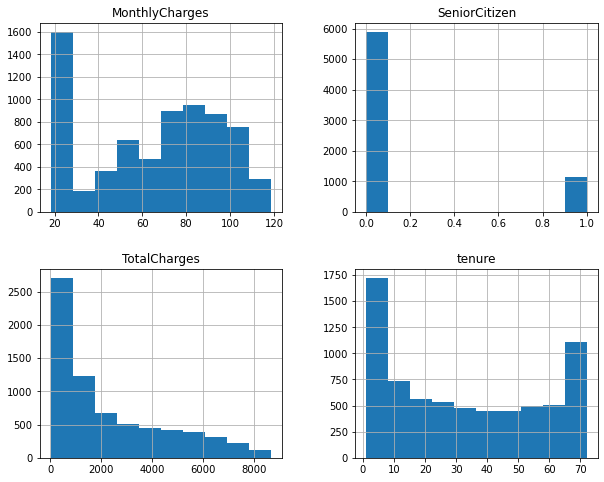

In [17]:
df.hist(figsize=(10,8));

## 2- Check Correlation

In [18]:
df.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.015683,0.219874,0.102411
tenure,0.015683,1.000000,0.246862,0.825880
MonthlyCharges,0.219874,0.246862,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


- lets take in consideration all variables

In [19]:
#Remove customer IDs from the data set
df2 = df.iloc[:,1:]
#Convertin the predictor variable "Churn" in a binary numeric variable
df2.replace({'Churn': {'Yes':1, 'No': 0 }}, inplace= True)



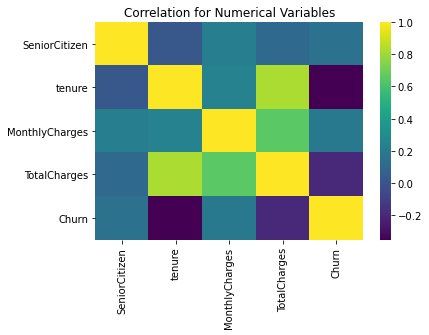

In [20]:
sns.heatmap(df2.corr(), cmap ="viridis")
plt.title("Correlation for Numerical Variables");

In [21]:
#Let's convert all the categorical variables into dummy variables
df_dummies = pd.get_dummies(df2)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


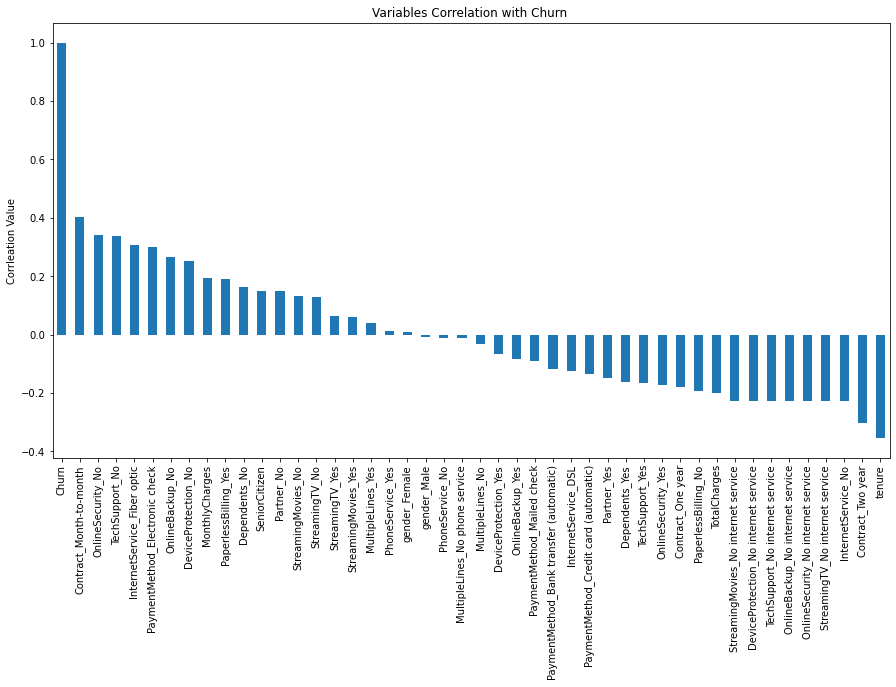

In [22]:
#plot the correlation for churn variable
plt.figure(figsize=(15,8))
df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind = 'bar')
plt.title("Variables Correlation with Churn ")
plt.ylabel("Corrleation Value");


## 3 - Demographics
    Let us first understand the gender, age range, patner and dependent status of the customers

#### 3.1 Gender (Pie)

In [23]:
df['gender'].value_counts(normalize=True)

Male      0.504693
Female    0.495307
Name: gender, dtype: float64

''

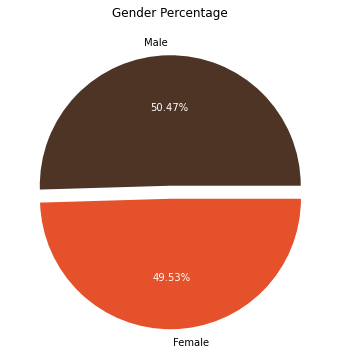

In [24]:
#creat a figure
fig, ax = plt.subplots( figsize = (6,6))
#change colors 
colors = ['#4D3425','#E4512B']
#set explode for pie chart
explode = (0, 0.1)

#plot the figure with getting patches, text, autotext values to be ablae to changde it
patches, texts, autotexts  = ax.pie(list(df['gender'].value_counts(normalize=True)),
                                    labels= list(df['gender'].value_counts().index),
                                    explode = explode,
                                    autopct='%.2f%%',
                                      colors = colors)

#chage the color of auto text inside pie to be white
autotexts[0].set_color('w')
autotexts[1].set_color('w')
ax.set_title('Gender Percentage')
;


#### 3.1 Gender (bar)

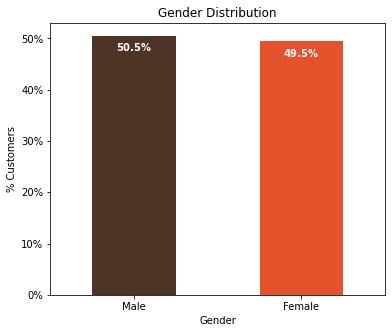

In [25]:
# For specifying the axes tick format 
import matplotlib.ticker as mtick 

fig,ax = plt.subplots(figsize = (6,5))
#change colors 
colors = ['#4D3425','#E4512B']

#plot the bar graph
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',rot = 0,color = colors)

#set the y axis values as perecentage
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('Gender')
ax.set_title('Gender Distribution')

##add percentage values inside bar

#values of x axis
x = df['gender'].unique()
#value to be added to each bar
y = list(df['gender'].value_counts(normalize = True).mul(100).round(1))

#plot the labels
for i in range(len(x)):
        plt.text(i, y[i]-3, str(y[i])+'%', ha = 'center', color = 'white',  weight = 'bold')

### 3.2 Age Range

In [26]:
df.groupby('SeniorCitizen')['Churn'].count()

SeniorCitizen
0    5890
1    1142
Name: Churn, dtype: int64

In [27]:
y = list(df['SeniorCitizen'].value_counts(normalize= True).mul(100).round(1))
y

[83.8, 16.2]

''

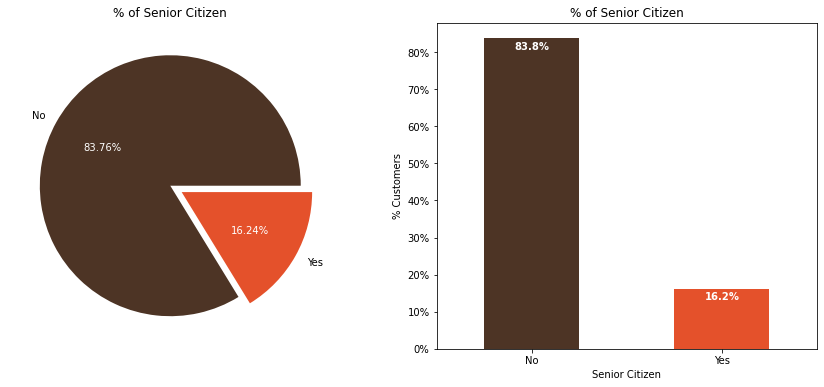

In [28]:
fig, ax = plt.subplots(1, 2, figsize = (15,6))


## Subplot with pie
patches, text, autotexts=ax[0].pie(list(df['SeniorCitizen'].value_counts(normalize=True)),
                                    labels= ['No', 'Yes'],
                                    explode = explode,
                                    autopct='%.2f%%',
                                      colors = colors)

autotexts[0].set_color('w')
autotexts[1].set_color('w')


ax[0].set_title('% of Senior Citizen');

##Subplot with bar

ax[1] = ((df['SeniorCitizen'].value_counts(normalize= True)*100).plot(kind= 'bar', rot = 0, color= colors ))

ax[1].yaxis.set_major_formatter(mtick.PercentFormatter())

ax[1].set_ylabel('% Customers')
ax[1].set_xlabel('Senior Citizen')
ax[1].set_xticklabels(['No','Yes'])
ax[1].set_title('% of Senior Citizen')

# plot values inside bars
x = df['SeniorCitizen'].unique()
y = list(df['SeniorCitizen'].value_counts(normalize= True).mul(100).round(1))

for i in range(len(x)):

    ax[1].annotate(str(y[i])+'%',(i, y[i]-3), ha = 'center', color = 'white',  weight = 'bold')
;




## 4 - Partner and dependent status 

In [29]:
df['Dependents'].value_counts(normalize = True).mul(100).round(2)

No     70.15
Yes    29.85
Name: Dependents, dtype: float64

In [30]:
df['Partner'].value_counts(normalize = True).mul(100).round(2)

No     51.75
Yes    48.25
Name: Partner, dtype: float64

- About 50% of the customers have a partner, while only 30% of the total customers have dependents. 
- Both features can be related so lets make special visualization

### 4-A) Plot Partner and dependen

In [31]:
df2=pd.melt(df[['customerID','Dependents','Partner']] , id_vars=['customerID'], value_vars=['Dependents','Partner'])

df2.head()

,customerID,variable,value
0,7590-VHVEG,Dependents,No
1,5575-GNVDE,Dependents,No
2,3668-QPYBK,Dependents,No
3,7795-CFOCW,Dependents,No
4,9237-HQITU,Dependents,No


In [32]:
#group by variable and value to get count of its status ("Yes", "No") for Dependents and Partner
df2.groupby(['variable','value']).count()

customerID
variable   value            
Dependents No           4933
           Yes          2099
Partner    No           3639
           Yes          3393

In [33]:
#do unstack to make each row represent each variable (Dependents and Partner) and use it in our visualization
depen_part = df2.groupby(['variable','value']).count().unstack()
depen_part

customerID      
value              No   Yes
variable                   
Dependents       4933  2099
Partner          3639  3393

In [34]:
#get the percentage 
depen_part= depen_part/len(df)*100
depen_part

customerID           
value              No        Yes
variable                        
Dependents  70.150739  29.849261
Partner     51.749147  48.250853

''

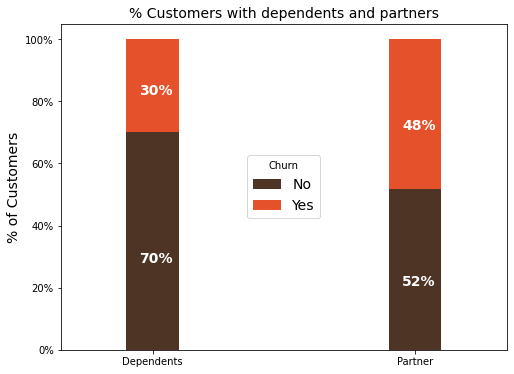

In [35]:
colors = ['#4D3425','#E4512B']

ax = depen_part['customerID'].plot(kind = 'bar', stacked = True, color = colors, figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xlabel('')
ax.set_ylabel('% of Customers', size = 14)
ax.set_title('% Customers with dependents and partners',size = 14)
ax.legend(loc = 'center',prop={'size':14}, title  = 'Churn')

##To know what is patchs, check the output of below print statements
#each patch represent portion of the stacked bar and we can use its height and width details in annotate
# print(ax.patches[0].get_height(),ax.patches[0].get_width())
# print(ax.patches[2].get_height(),ax.patches[2].get_width()) 
# print(ax.patches[1].get_height(),ax.patches[1].get_width())      
# print(ax.patches[3].get_height(),ax.patches[3].get_width()) 



for p in ax.patches:
    #get width and heights of the patch, so height represent the percentage value too
    width, height = p.get_width(), p.get_height()
    #get the xy value for the start postion of the patch
    x, y = p.get_xy() 

    #center the valus inside the patch
    ax.annotate('{:.0f}%'.format(height), (x+.25*width, y+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

;



*What would be interesting is to look at the % of customers, who have partners, also have dependents. We will explore this next.*

Interestingly, among the customers who have a partner, only about half of them also have a dependent, while other half do not have any dependents. Additionally, as expected, among the customers who do not have any partner, a majority (70%) of them do not have any dependents .


### 4 - B) Plot Partner cutomers and check if they have dependent or not

In [36]:
df.groupby(['Partner','Dependents']).size()

Partner  Dependents
No       No            3280
         Yes            359
Yes      No            1653
         Yes           1740
dtype: int64

In [37]:
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()
partner_dependents 

Dependents,No,Yes
Partner,,
No,3280,359
Yes,1653,1740


In [38]:
#we can transpose the relation as below
partner_dependents_T = df.groupby(['Dependents', 'Partner']).size().T.unstack()
partner_dependents_T 

Partner,No,Yes
Dependents,,
No,3280,1653
Yes,359,1740


In [39]:
partner_dependents_T.sum()

Partner
No     3639
Yes    3393
dtype: int64

In [40]:
partner_dependents.sum()

Dependents
No     4933
Yes    2099
dtype: int64

In [41]:
#get the ratio
partner_dependents.T*100.0 / partner_dependents.T.sum()

Partner,No,Yes
Dependents,,
No,90.134652,48.717949
Yes,9.865348,51.282051


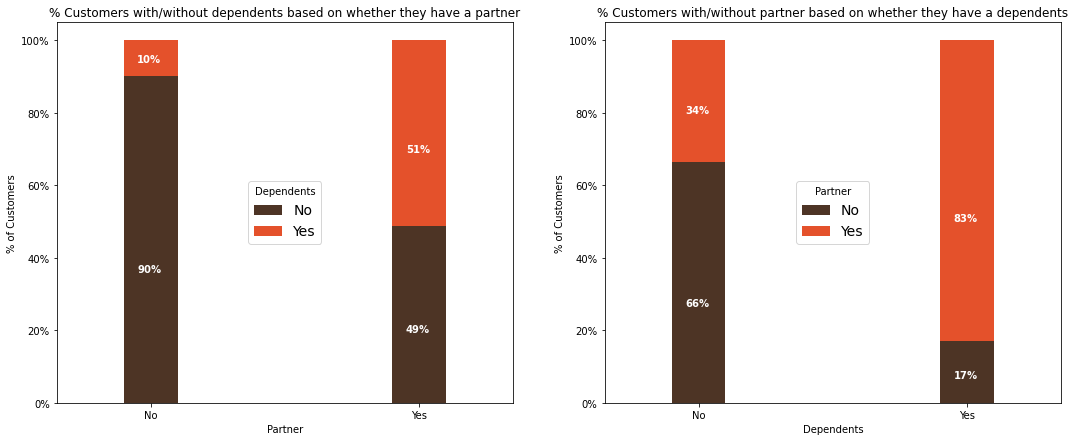

In [42]:
#we can check both realtions in sub plots 
fig, axes = plt.subplots(1, 2, figsize = (18,7))


##Dependants to Partner
axes[0] = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = axes[0],
                                                                color = colors)
                                                        

axes[0].set_title('% Customers with/without dependents based on whether they have a partner')
axes[0].set_ylabel('% of Customers')
axes[0].legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter())

for p in axes[0].patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    axes[0].annotate('{:.0f}%'.format(height), (x+.25*width, y+.4*height), color = 'white', weight = 'bold')
    

    

#Partner to Dependants 

axes[1] = (partner_dependents*100.0 / partner_dependents.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                ax = axes[1],
                                                                color = colors
                                                                    )

axes[1].set_title('% Customers with/without partner based on whether they have a dependents')
axes[1].set_ylabel('% of Customers')
axes[1].legend(loc='center',prop={'size':14},title = 'Partner',fontsize =14)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter())

for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    axes[1].annotate('{:.0f}%'.format(height), (x+.25*width, y+.4*height), color = 'white', weight = 'bold')



## 5 - Customer Account Information: Let u now look at the tenure, contract


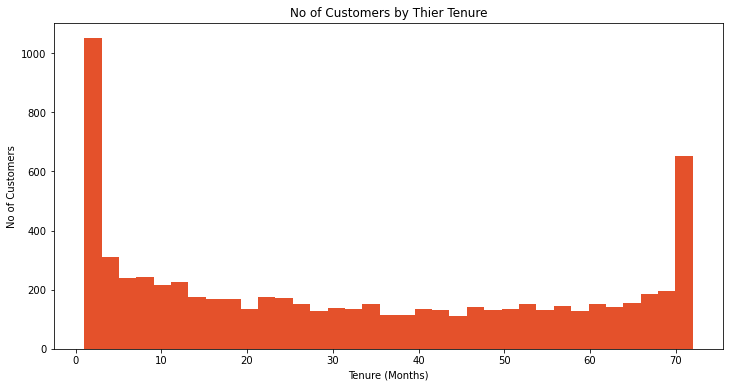

In [43]:
single_color = '#E4512B'
fig, ax = plt.subplots(figsize= (12,6))
ax = df['tenure'].plot(kind = 'hist', bins = 35, color = single_color)

ax.set_xlabel('Tenure (Months)')
ax.set_ylabel('No of Customers')
ax.set_title('No of Customers by Thier Tenure');

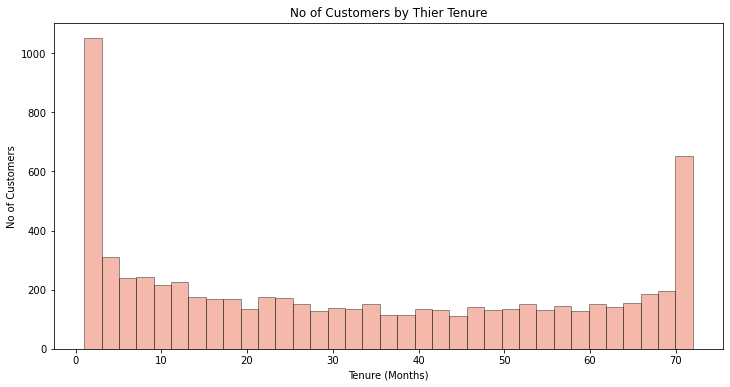

In [44]:
fig, ax = plt.subplots(figsize= (12,6))

ax = sns.distplot(df['tenure'], hist= True, kde = False, bins = 35,
                              hist_kws={'edgecolor':'black'},
                              kde_kws={'linewidth': 4},
                              color= single_color)
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (Months)')
ax.set_title('No of Customers by Thier Tenure');

## 6 - Contract Type

''

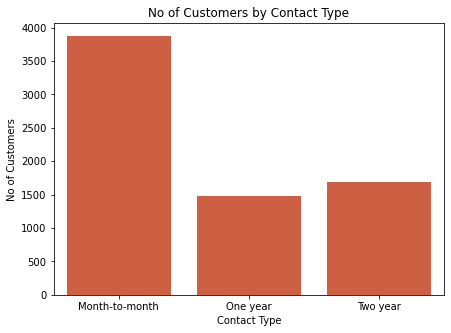

In [45]:
fig, ax = plt.subplots(figsize = (7,5))
ax = sns.countplot(data = df, x = 'Contract', color = single_color )

ax.set_xlabel('Contact Type')
ax.set_ylabel('No of Customers')
ax.set_title('No of Customers by Contact Type')

;

- Most of customers has Month-to-Month contact and they leave the company after few months, customers with long contact has more loyality 


''

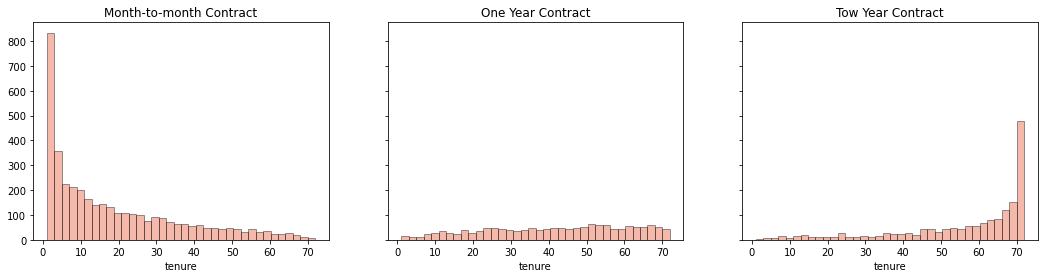

In [46]:
fig, (ax1,ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (18,4))

ax = sns.distplot(df[df['Contract'] == 'Month-to-month']['tenure'], hist= True, kde = False, bins = int(180/5),
                              hist_kws={'edgecolor':'black'},
                              kde_kws={'linewidth': 4}, color = single_color,
                            ax = ax1)
ax.set_title('Month-to-month Contract')

ax = sns.distplot(df[df['Contract'] == 'One year']['tenure'], hist= True, kde = False, bins = int(180/5),
                              hist_kws={'edgecolor':'black'},color = single_color,
                              kde_kws={'linewidth': 4},
                             ax = ax2)
ax.set_title('One Year Contract')

ax = sns.distplot(df[df['Contract'] == 'Two year']['tenure'], hist= True, kde = False, bins = int(180/5),
                              hist_kws={'edgecolor':'black'},color = single_color,
                              kde_kws={'linewidth': 4},
                             ax = ax3)
ax.set_title('Tow Year Contract')
;

- Most of customers with Month-to-Month Contact leaves the company early, while customers with long term contract stay longer



## 7 - Distribution of various services used by customers


In [47]:
#extract service
services = ['PhoneService', 'MultipleLines', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies']

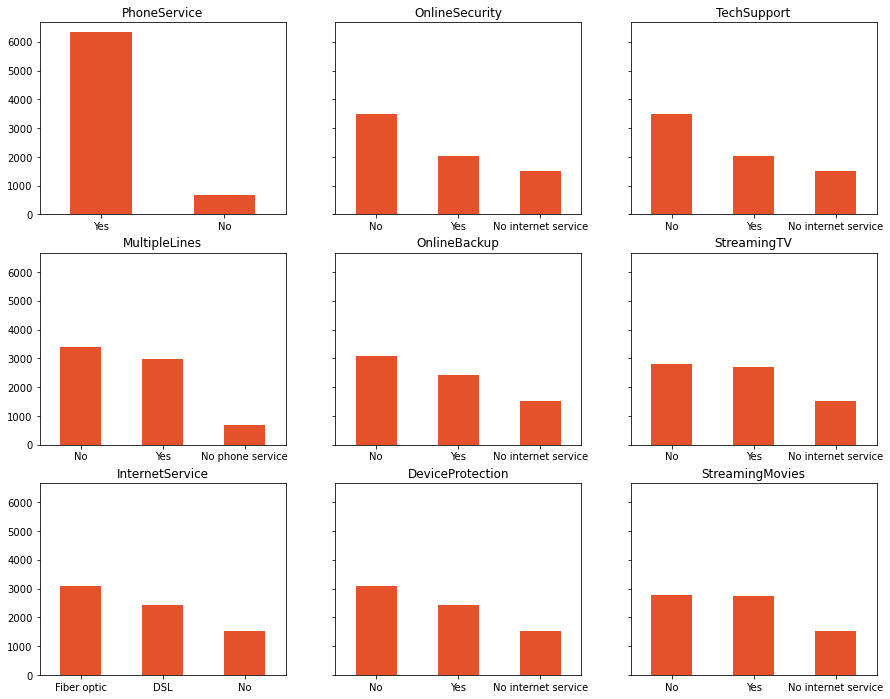

In [48]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, sharey = True, figsize = (15,12))
for i, item in enumerate(services):
    
    if i< 3:
        ax = df[item].value_counts().plot( kind = 'bar', ax = axes[i,0], rot = 0, color = single_color)
    elif i>=3 and i<6:
        ax = df[item].value_counts().plot( kind = 'bar', ax = axes[i-3,1], rot = 0, color = single_color)
    elif i < 9:
        ax = df[item].value_counts().plot( kind = 'bar', ax = axes[i-6,2], rot = 0, color = single_color)
    ax.set_title(item)

- Some customers doesn't have voice service, they may use data sim only
- OnlineSecurity, TechSupport almost have the same distribution
- Customers with internet servie using Fiber Optics more than DSL


## 8 -  Relation between monthly and total charges

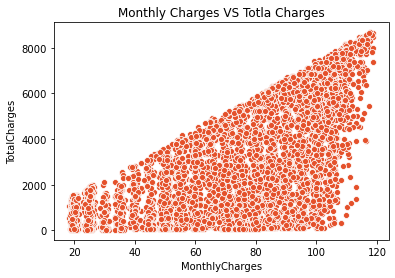

In [49]:
sns.scatterplot(data = df, x = 'MonthlyCharges', y = 'TotalCharges', color = single_color)
plt.title('Monthly Charges VS Totla Charges');

- The more Monthly charges the more Total Charges

## 10 - Churn Analysis

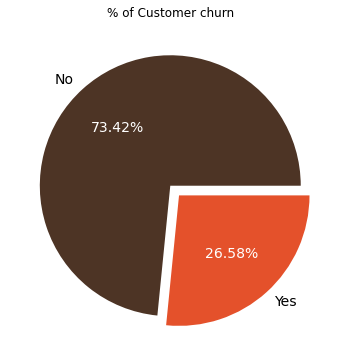

In [50]:
#plot churn percentage
fig, ax = plt.subplots( figsize = (6,6))

explode = (0, 0.1)

patches, texts, autotexts  = ax.pie(list(df['Churn'].value_counts().values),
                                    labels= list(df['Churn'].value_counts().index),
                                    explode = explode,
                                    textprops={'fontsize': 14},
                                    autopct='%.2f%%',
                                      colors = colors)
autotexts[0].set_color('w')
autotexts[1].set_color('w')
ax.set_title('% of Customer churn');


About 27% of the customers churn **one of each 4 customers churned**, 
the average churn rate for mobile services in developed markets is about 20%, while in emerging markets it can be as high as 50%.”.

Reducing churn by just 1% can increase profits by up to 5% as it costs *5 TIMES MORE* to acquire new customers than it does to keep an existing one.



- Lets now explore the churn rate by tenure, seniority, contract type, monthly charges and total charges to see how it varies by these variables.


## 10-1 Churn vs Tenure


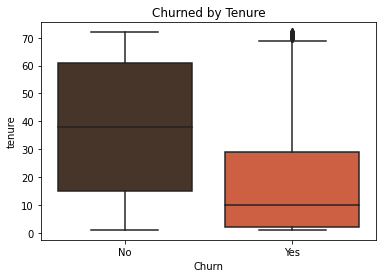

In [51]:
#churn by tenure
sns.boxplot(data = df, x= 'Churn', y = 'tenure', palette = colors )
plt.title('Churned by Tenure');

- Customers who do not churn, they tend to stay for a longer tenure with the telecom company.


## 10.2 Churn by Contract Type

In [52]:
df.groupby(['Contract','Churn']).size().unstack()

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1306,166
Two year,1637,48


''

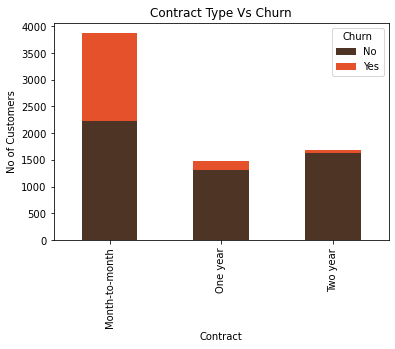

In [53]:
ax = (df.groupby(['Contract','Churn'])['Churn'].count().unstack().plot(kind = 'bar', stacked = True, color = colors))

ax.set_title('Contract Type Vs Churn')
ax.set_ylabel('No of Customers')
;

-  Confirming to our observation from the correlation plot customers with a month to month contract have a very high churn rate.

## 10.3 Churn by Seniority

In [54]:
citizen_df = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
citizen_df

Churn,No,Yes
SeniorCitizen,,
0,4497,1393
1,666,476


In [55]:
citizen_df.T.sum()

SeniorCitizen
0    5890
1    1142
dtype: int64

In [56]:
#get the percentange, we make transpose to get the sum of the columns
(citizen_df.T*100.0/citizen_df.T.sum())

SeniorCitizen,0,1
Churn,,
No,76.349745,58.318739
Yes,23.650255,41.681261


In [57]:
(citizen_df.T*100.0/citizen_df.T.sum()).T

Churn,No,Yes
SeniorCitizen,,
0,76.349745,23.650255
1,58.318739,41.681261


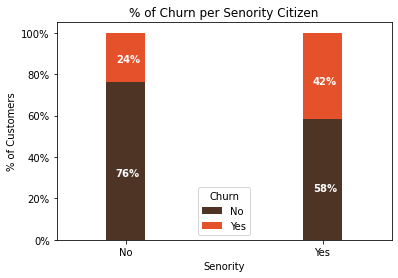

In [58]:
ax= (citizen_df.T*100/ citizen_df.T.sum()).T.plot(kind= 'bar', stacked = True, color = colors, width = 0.2, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

ax.set_ylabel('% of Customers')
ax.set_xlabel('Senority')
ax.set_title('% of Churn per Senority Citizen')
ax.set_xticklabels(['No','Yes'])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold')
    
    

- Senior Citizens have almost double the churn rate than younger population.

## 10.4 Churn by Monthly and Total Charges


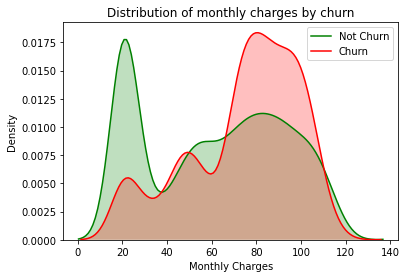

In [59]:
#Churn by monthy Charges
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color='g', shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color='r', shade= True,)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn');

- Higher % of customers churn when the monthly charges are high.

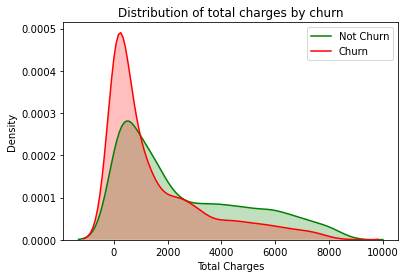

In [60]:
#Churn by Total Charges
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'No') ],
                color="g", shade = True)
ax = sns.kdeplot(df.TotalCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="r", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn');

- The peak of churned and Not Churned customers occuers on the same vlaue of total charges

## 10.5 Churned Users for StreamingTV Category

In [61]:
StreamingTV = df.groupby(['StreamingTV','Churn']).size().unstack()
StreamingTV

Churn,No,Yes
StreamingTV,,
No,1867,942
No internet service,1407,113
Yes,1889,814


''

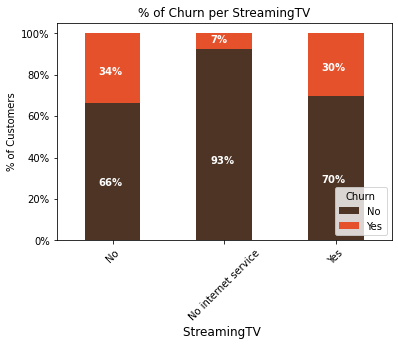

In [62]:
 ax = (StreamingTV.T*100 / StreamingTV.T.sum()).T.plot(kind = 'bar', rot = 45, 
                                                                         color = colors, stacked = True)


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Customers')
ax.set_xlabel('StreamingTV ', fontsize = 12)
ax.set_title('% of Churn per StreamingTV')
ax.legend(loc = 4, title  = 'Churn')
;
#ax.legend(loc = 0)
#plt.ylim(0, 2300)

## 10.6 Online Security

In [63]:
df.groupby(['OnlineSecurity','Churn']).size().unstack()

Churn,No,Yes
OnlineSecurity,,
No,2036,1461
No internet service,1407,113
Yes,1720,295


In [64]:
online_sec = df.groupby(['OnlineSecurity','Churn']).size().unstack()

In [65]:
online_sec.T*100 / online_sec.T.sum()

OnlineSecurity,No,No internet service,Yes
Churn,,,
No,58.221333,92.565789,85.359801
Yes,41.778667,7.434211,14.640199


''

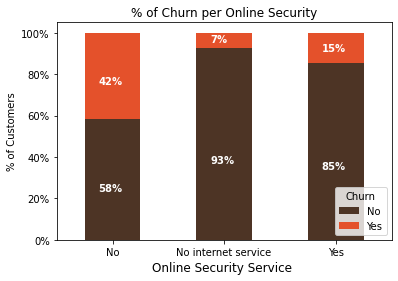

In [66]:
 ax = (online_sec.T*100 / online_sec.T.sum()).T.plot(kind = 'bar', 
                                                     stacked = True, 
                                                     color = colors, 
                                                     rot = 0)
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Customers')
ax.set_xlabel('Online Security Service ', fontsize = 12)
ax.set_title('% of Churn per Online Security')
ax.legend(loc = 4, title  = 'Churn')
;

- Customers without online security sevice tends to cheurn more than others customers

## 10.7 TechSupport

In [67]:
tech_support = df.groupby(['TechSupport','Churn']).size().unstack()
tech_support

Churn,No,Yes
TechSupport,,
No,2026,1446
No internet service,1407,113
Yes,1730,310


''

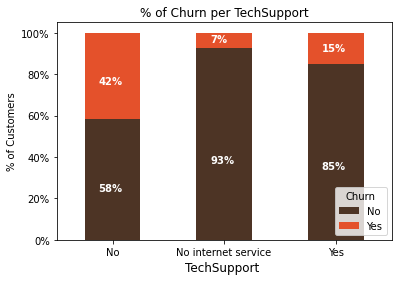

In [68]:
 ax = (tech_support.T*100 / tech_support.T.sum()).T.plot(kind = 'bar', 
                                                     stacked = True, 
                                                     color = colors, 
                                                     rot = 0)
    
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x,y = p.get_xy()
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height), color = 'white', weight = 'bold')

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% of Customers')
ax.set_xlabel('TechSupport ', fontsize = 12)
ax.set_title('% of Churn per TechSupport')
ax.legend(loc = 4, title  = 'Churn')
;

- Encourging customers to have TechSupport may reduce the churn

## 10.8 Payment Method

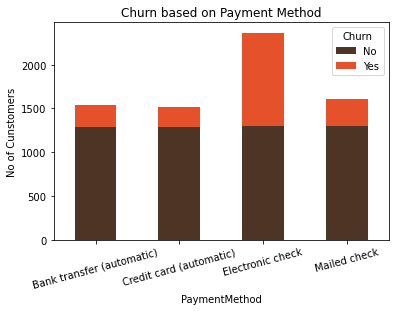

In [69]:
#check churn based on payment method
ax = df.groupby(['PaymentMethod', 'Churn']).size().unstack().plot(kind = 'bar',
                                                                  stacked = True, 
                                                                  color = colors , 
                                                                  rot = 15)

ax.set_title('Churn based on Payment Method')
ax.set_ylabel('No of Cunstomers');

- About half of customers pay with Electronic Checks cheurbed 

## 10.9 No Phone Service

I want to see the Churn behavior of cusmoters without phone service

In [70]:
#make df for customers without phone service
no_phone_service = df[df['PhoneService'] == 'No']

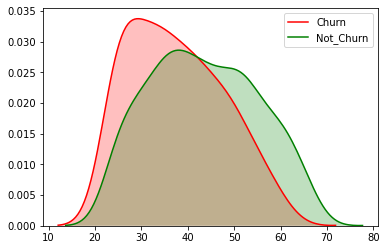

In [71]:
#check churn based on Month Charges
ax = sns.kdeplot(no_phone_service['MonthlyCharges'][no_phone_service['Churn'] == "Yes"],
                 color = 'r',
                shade = True)
ax = sns.kdeplot(no_phone_service['MonthlyCharges'][no_phone_service['Churn'] == "No"],
                 color = 'g',
                shade = True)
ax.legend(['Churn', 'Not_Churn']);

- All customers nearly have the same monthly charges 

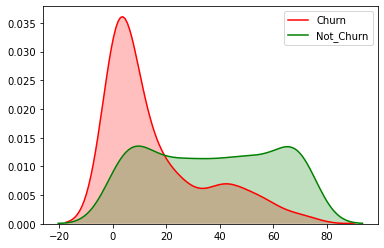

In [72]:
#check churn based on tenure
ax = sns.kdeplot(no_phone_service['tenure'][no_phone_service['Churn'] == "Yes"],
                 color = 'r',
                shade = True)
ax = sns.kdeplot(no_phone_service['tenure'][no_phone_service['Churn'] == "No"],
                 color = 'g',
                shade = True)
ax.legend(['Churn', 'Not_Churn']);

- Most of customers churn after short period

In [73]:
#list of other categorical attributes
attributes = ['PaperlessBilling', 'Contract', 'InternetService',
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies',
             'Partner', 'Dependents', 'PaymentMethod']

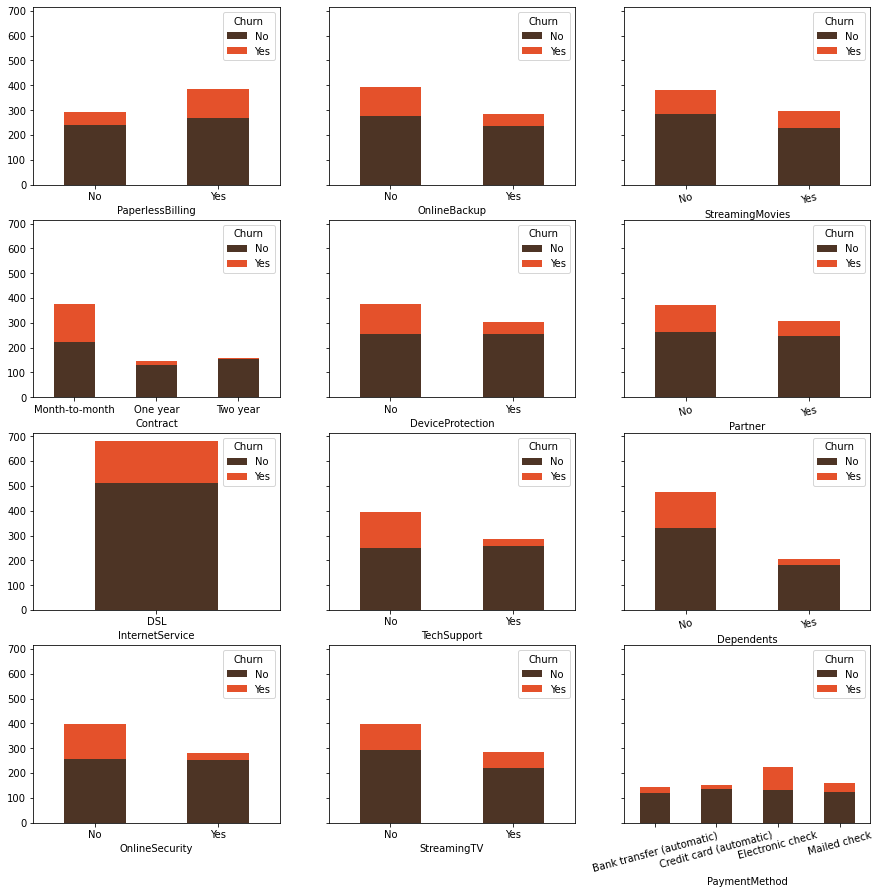

In [74]:
#Quick view for churn based on other attributed
fig, axes = plt.subplots(nrows = 4, ncols = 3, sharey = True, figsize = (15,15))
for i, item in enumerate(attributes):
    if i < 4:
        no_phone_service.groupby([item,'Churn']).size().unstack().plot(kind = 'bar', 
                                                                       stacked = True,
                                                                       rot = 0,
                                                                       color = colors,
                                                                       ax = axes[i,0])
    elif i>=4 and i<8:
        no_phone_service.groupby([item,'Churn']).size().unstack().plot(kind = 'bar', 
                                                                       stacked = True,
                                                                       rot = 0,
                                                                       color = colors,
                                                                       ax = axes[i-4,1])
    elif i >= 8 and i< 12:
        no_phone_service.groupby([item,'Churn']).size().unstack().plot(kind = 'bar', 
                                                                   stacked = True,
                                                                   rot = 15,
                                                                   color = colors,
                                                                   ax = axes[i-8,2])

        
ax.set_title(item);

# Conclousion 

- Encourage customers with month to month contract to have a yearly contract
- Studty cuompetitve prices as high percentage of churn due to high monthly cahrges
- Encourge customers to have a have Tech Support and build a good support team
- Customers paying with electronic check has a high churn rate, we need to revise if they face technical issues and enhace its process